## Métodos de Otimização: Métodos Heuristicos

### Enxame de Partículas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Enxame de Partículas' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
nFunc = 5
Qvar = 2
Qtind = 50
kmax = 150
countFunc = 0

pop =np.zeros((Qtind,Qvar) , dtype = 'float')
x =np.zeros((Qtind,Qvar) , dtype = 'float')
fHist = []
fpop =np.zeros(Qtind , dtype = 'float')
fsol =np.zeros(Qtind , dtype = 'float')
pbest =np.zeros(Qvar , dtype = 'float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
r =np.zeros(Qvar , dtype = 'float')
r1 =np.zeros(Qvar , dtype = 'float')
r2 =np.zeros(Qvar , dtype = 'float')

xmin[0] = -5; xmin[1] = 0
xmax[0] = 10; xmax[1] = 15

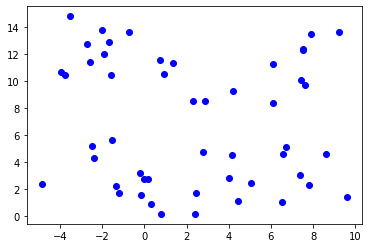

In [4]:
#criando a populacao inicial e suas funcoes objetivo
#o melhor individuo ja esta definido (pop == pi)

for i in range(0, Qtind):
    for j in range(0, Qvar):
        r[j] = random.random()
        pop[i,j] = xmin[j]+(1.-r[j])*(xmax[j]-xmin[j])
    fpop[i],countFunc = f(pop[i,:],nFunc,Qvar,countFunc)

plt.plot(pop[:,0], pop[:,1], 'bo')
plt.show()

In [5]:
minlocobj=np.argmin(fpop)
pbest[:]=pop[minlocobj,:]
fbest=fpop[minlocobj]
print(fbest)

2.05779468654311


In [6]:
x=pop.copy()
layout = "{0:.5f}"
k=0
while k < kmax:
    k += 1
    for i in range(0, Qtind):
        for j in range(0, Qvar):
            r1[j] = random.random()
            r2[j] = random.random()
            x[i,j] = x[i,j] + 2.*r1[j]*(pop[i,j]-x[i,j]) + 2.*r2[j]*(pbest[j]-x[i,j])
            x[i,j] = max(min(x[i,j],xmax[j]),xmin[j])

        fsol[i],countFunc = f(x[i,:],nFunc,Qvar,countFunc)
        
    for i in range(0, Qtind):
        if fsol[i] < fpop[i] :
            fpop[i]=fsol[i]
            pop[i,:]=x[i,:]
    
    minlocobj=np.argmin(fpop)
    pbest[:]=pop[minlocobj,:]
    fbest=fpop[minlocobj]
    print(layout.format(pbest[0])+" "+layout.format(pbest[1])+" "+layout.format(fbest))
    fHist.append(fbest)
    

3.52595 1.78656 1.14165
3.07701 2.05563 0.49095
3.07701 2.05563 0.49095
3.07953 2.19128 0.43396
3.12972 2.30695 0.39908
3.12972 2.30695 0.39908
3.14494 2.28231 0.39804
3.14475 2.27894 0.39798
3.14475 2.27894 0.39798
3.13890 2.28013 0.39793
3.14024 2.27917 0.39791
3.14117 2.27343 0.39789
3.14112 2.27496 0.39789
3.14116 2.27572 0.39789
3.14144 2.27572 0.39789
3.14169 2.27454 0.39789
3.14169 2.27454 0.39789
3.14169 2.27454 0.39789
3.14169 2.27454 0.39789
3.14158 2.27517 0.39789
3.14161 2.27497 0.39789
3.14161 2.27497 0.39789
3.14161 2.27497 0.39789
3.14160 2.27497 0.39789
3.14159 2.27498 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 0.39789
3.14159 2.27500 

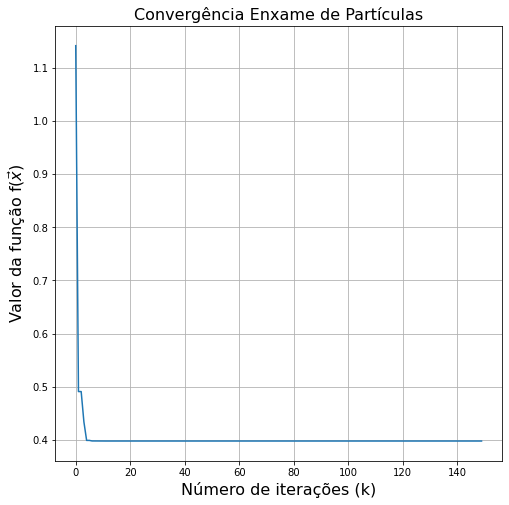

In [8]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [9]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  7550
Tempo de Execução = 163.30878734588623 s
